In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator 

Load the Hallem-Carlson dataset and compute the population mean. Multiply at m = 0.05 as in Luo et al.

In [35]:
m = 0.05

In [36]:
fp = "hc_data.csv"
df = pd.read_csv(fp)

HC = df.to_numpy()[1:,2:].astype(float)
#add spontaneous, and remove row
HC2 = HC[:-1,:] + HC[-1,:]

N = np.shape(HC2)[0]
## Rectify and sort
HC2[HC2 < 0] = 0
# Step 1: Calculate sum along rows and columns
row_sums = np.sum(HC2, axis=1)
col_sums = np.sum(HC2, axis=0)

# Step 2: Sort rows based on the sum of rows
row_sorted_indices = np.argsort(row_sums)
arr_sorted_by_rows = HC2[row_sorted_indices]

# Step 3: Sort columns based on the sum of columns
col_sorted_indices = np.argsort(col_sums)
HC3 = arr_sorted_by_rows[:, col_sorted_indices]

#Compute population mean and multiply by m and compute average acorss odors
SORN = np.sum(HC3,axis=1)
np.mean(m * SORN)

np.float64(46.27204301075269)

Rate function parameters from Olsen et al.

In [37]:
R_max = 165
sigma = 12

PN response variability as from Luo et al.

In [38]:
delta = 10
alpha = 0.025
SD = lambda mu: delta * np.tanh(alpha*mu)

Rate function

In [39]:
PN = lambda ORN, i, g: R_max * ((g * ORN)**1.5/ ((g * ORN)**1.5 + (m*SORN[i])**1.5 + sigma**1.5))

Compute 2SD larger than mean

In [40]:
np.mean([[PN(x,i,1) for x in HC3[i,:]] for i in np.arange(0, N)]) + 2*SD(np.mean([[PN(x,i,1) for x in HC3[i,:]] for i in np.arange(0, N)]))

np.float64(68.61954870725648)

Rate function with s instead of m*SORN

In [41]:
PN_widths = lambda ORN, s, g: R_max * ((g * ORN)**1.5/ ((g * ORN)**1.5 + s**1.5 + sigma**1.5))

In [42]:
#range of ORN values
ORN = np.arange(0., 120, 0.2)

In [ ]:
ss = [50,100]
gs = [1,11]
PNs = [[[PN_widths(x,s,g) for x in ORN] for s in ss] for g in gs]

Fig 6B

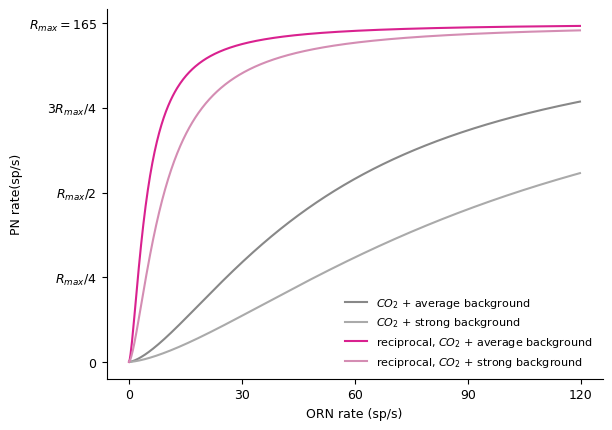

In [44]:
plt.plot(ORN, PNs[0][0], label='$CO_{2}$ + average background', color='#888888')
plt.plot(ORN, PNs[0][1], label='$CO_{2}$ + strong background', color='#aaaaaa')
plt.plot(ORN, PNs[1][0], label='reciprocal, $CO_{2}$ + average background', color='#d9218f')
plt.plot(ORN, PNs[1][1], label='reciprocal, $CO_{2}$ + strong background', color='#d48db3')
plt.xlabel("ORN rate (sp/s)", fontsize=9)
plt.ylabel("PN rate(sp/s)", fontsize=9)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=5))  # Reduce x ticks to 4
plt.yticks([0, R_max/4, R_max/2, 3*R_max/4, R_max], ['$0$', '$R_{max}/4$', '$R_{max}/2$', '$3R_{max}/4$', '$R_{max}=165$'])
plt.tick_params(axis='y', labelsize=9)  # X-axis tick label font size
plt.tick_params(axis='x', labelsize=9)  # X-axis tick label font size
plt.legend(fontsize=8, frameon=False)  # Set legend font size here
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("Fig6B.svg", dpi=300, bbox_inches="tight")

Fig 6C

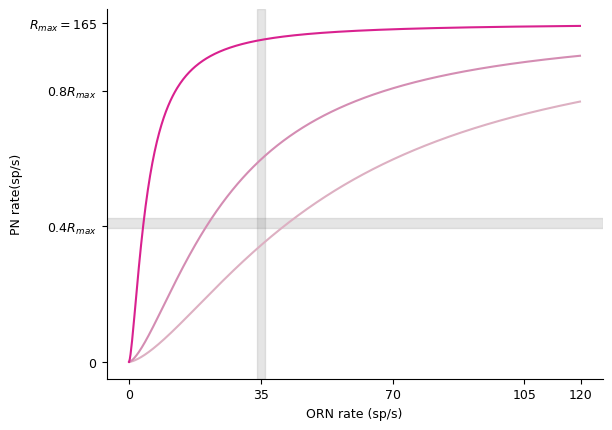

In [45]:
s=50

plt.plot(ORN, np.array([PN_widths(x,s,1) for x in ORN]), color='#ddb0c2')
plt.plot(ORN, np.array([PN_widths(x,s,2) for x in ORN]), color='#d48db3')
plt.plot(ORN, np.array([PN_widths(x,s,11) for x in ORN]), color='#d9218f')

plt.axvspan(34, 36, color='gray', alpha=0.2)
plt.axhspan(65, 70, color='gray', alpha=0.2)

plt.xlabel("ORN rate (sp/s)", fontsize=9)
plt.ylabel("PN rate(sp/s)", fontsize=9)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=5))  # Reduce x ticks to 4
plt.yticks([0, 0.4 * R_max, 0.8 * R_max, R_max], ['$0$', '$0.4R_{max}$', '$0.8R_{max}$', '$R_{max}=165$'])
plt.xticks([0, 35, 70, 105, 120])
plt.tick_params(axis='y', labelsize=9)  # X-axis tick label font size
plt.tick_params(axis='x', labelsize=9)  # X-axis tick label font size

plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("Fig6C.svg", dpi=300, bbox_inches="tight")

Use root_scalar to find g that achieve 0.4R_max for ORN rate of 35 sp/s

In [46]:
from scipy.optimize import root_scalar

In [47]:
def f(x, g, s):
    return np.array(PN_withs(x,s,g) - 0.4 * R_max)

In [48]:
ss = np.arange(0, R_max-2, 0.2)
ORN = 35
roots = [root_scalar(lambda g: f(ORN, g, s), bracket=[0, 11]).root for s in ss]

Make numpy and recitify

In [49]:
roots = np.array(roots)
roots[roots < 1] = 1

Fig 6D

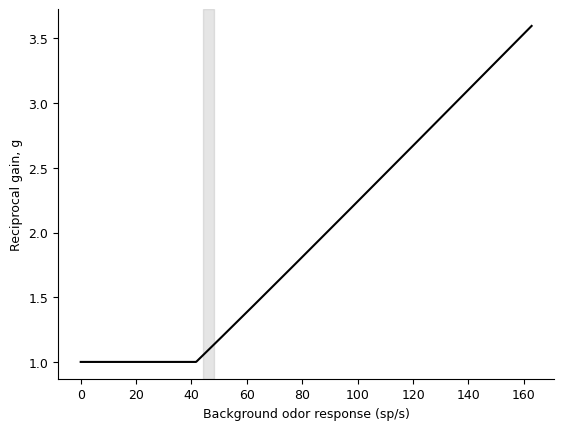

In [51]:
plt.plot(ss, roots, color="black")
plt.xlabel("Background odor response (sp/s)", fontsize=9)
plt.ylabel("Reciprocal gain, g", fontsize=9)

plt.axvspan(44, 48, color='gray', alpha=0.2)

plt.tick_params(axis='y', labelsize=9)  # X-axis tick label font size
plt.tick_params(axis='x', labelsize=9)  # X-axis tick label font size

plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("Fig6D.svg", dpi=300, bbox_inches="tight")